If you want to view this as a slideshow, press the bar chart button <button class="btn btn-default" data-jupyter-action="RISE:slideshow"><i class="fa-bar-chart fa"></i></button> above.  If it doesn't appear, you'll need to install the [RISE slideshow extension](https://rise.readthedocs.io/en/stable/).

To save as PDF, run
```bash
jupyter nbconvert --to slides outline.ipynb --template slide_reveal_custom.tpl --post serve
```
This will open a new browser tab.  Remove any `#` from and add `?print-pdf` to the end of the URL, print, select Landscape, and save as PDF.

# Gravitational Waveform Data

# Natural questions

- What data are available?
- Where are the data?
- How do we use the data?

# Outline

* Simulations
  * SpEC
  * The numbers
  * Post-processing
* The data
  * What's included
  * How to get it
  * Formats
  * Problems
  * Solutions
* Software

# Not just waveforms

  - metadata for *each* simulation
  - metadata for *all* simulations
  - horizons
  - waveforms

# We need to make data
  - as small as possible
  - reproducible / citeable
  - easy to find
  - easy to get
  - easy to use

# Small data

* New waveform format! 🚀
* Less reliance on monolithic files <img style='vertical-align:middle; display:inline;' src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExMWFydDZiYnNyNmhwbGZtbXZtd2t2YW85cXNkdjJlNTNsYWhtajAxeiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/sSgvbe1m3n93G/giphy.gif" width="30"/>


# Citeable / reproducible

* Pesistent storage (Zenodo)
* Simulation IDs
* DOIs

# Easy to find

We need to make it easy to search metadata
  - interactively
  - programmatically

# Easy to get

Downloading should be
  - hands-off
  - programmatic
  - automatic, if desired
  - cached, if desired

# Easy to use

* Separate backend from user interface
* Interface should be simple
* Interface should be consistent

# TL;DR

`sxs.load` does it all!

```python
sxs.load("simulations")
sxs.load("SXS:BBH:1234")
sxs.load("SXS:BBH:1234").metadata
sxs.load("SXS:BBH:1234").horizons
sxs.load("SXS:BBH:1234").h
sxs.load("SXS:BBH:1234").psi4
```

We want to make it as simple as possible to access all of these types
of data, so we have a unified interface:
  - `sxs.load`

(This interface is especially important because we have made the new
data formats very complicated, under the hood, so we want to hide that
complexity from the user.)

# SXS simulations

# Numbers
  
| Year | Number of simulations |
| :-- | --: |
| 2013   |   174 |
| 2019   |  2018 |
| 2024b1 |  2778 |
| 2024?  | ~4400 |

# New catalog (so far)
  - *Slightly* longer on average
  - More eccentric systems
  - About 22 with mass ratios greater than 10
  - 3 new BHNS; no new NSNS

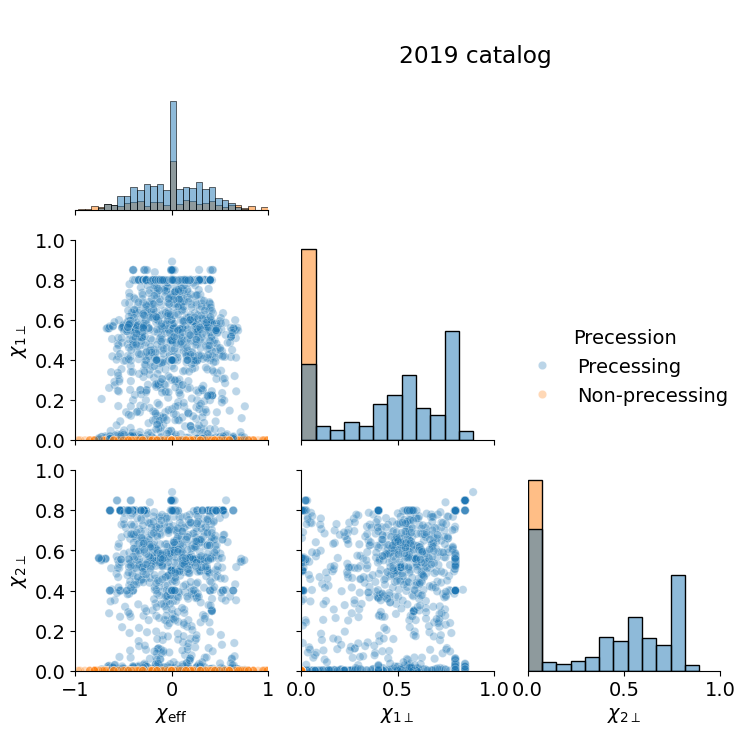

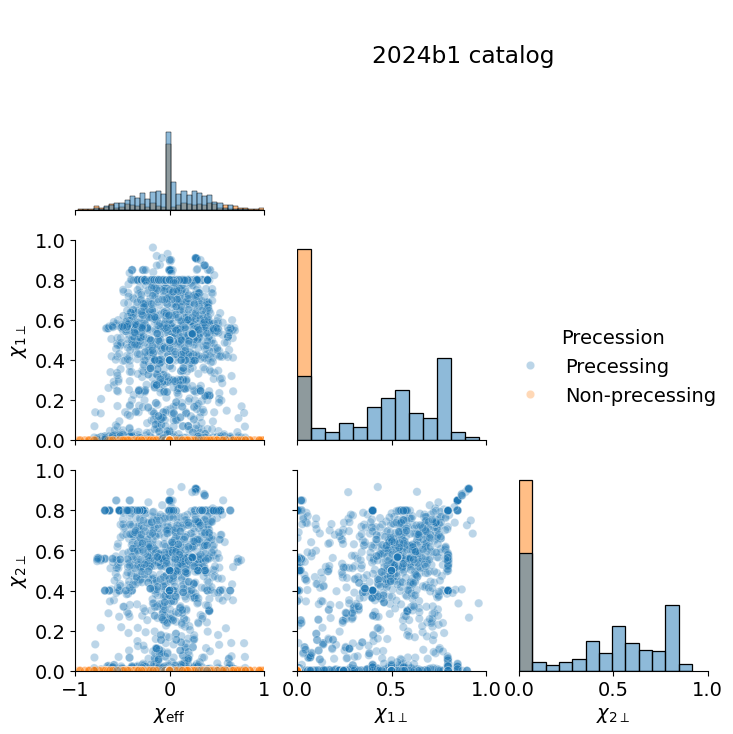

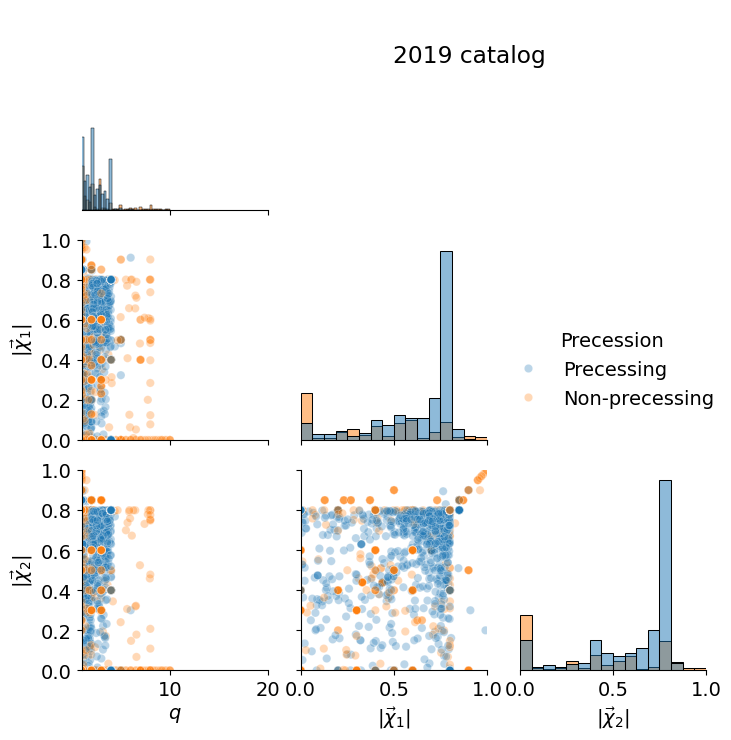

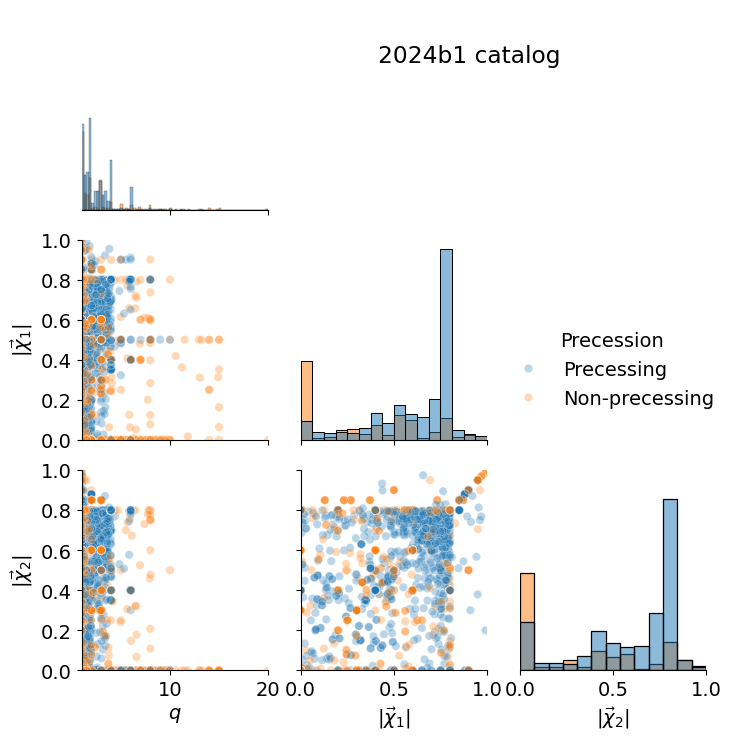

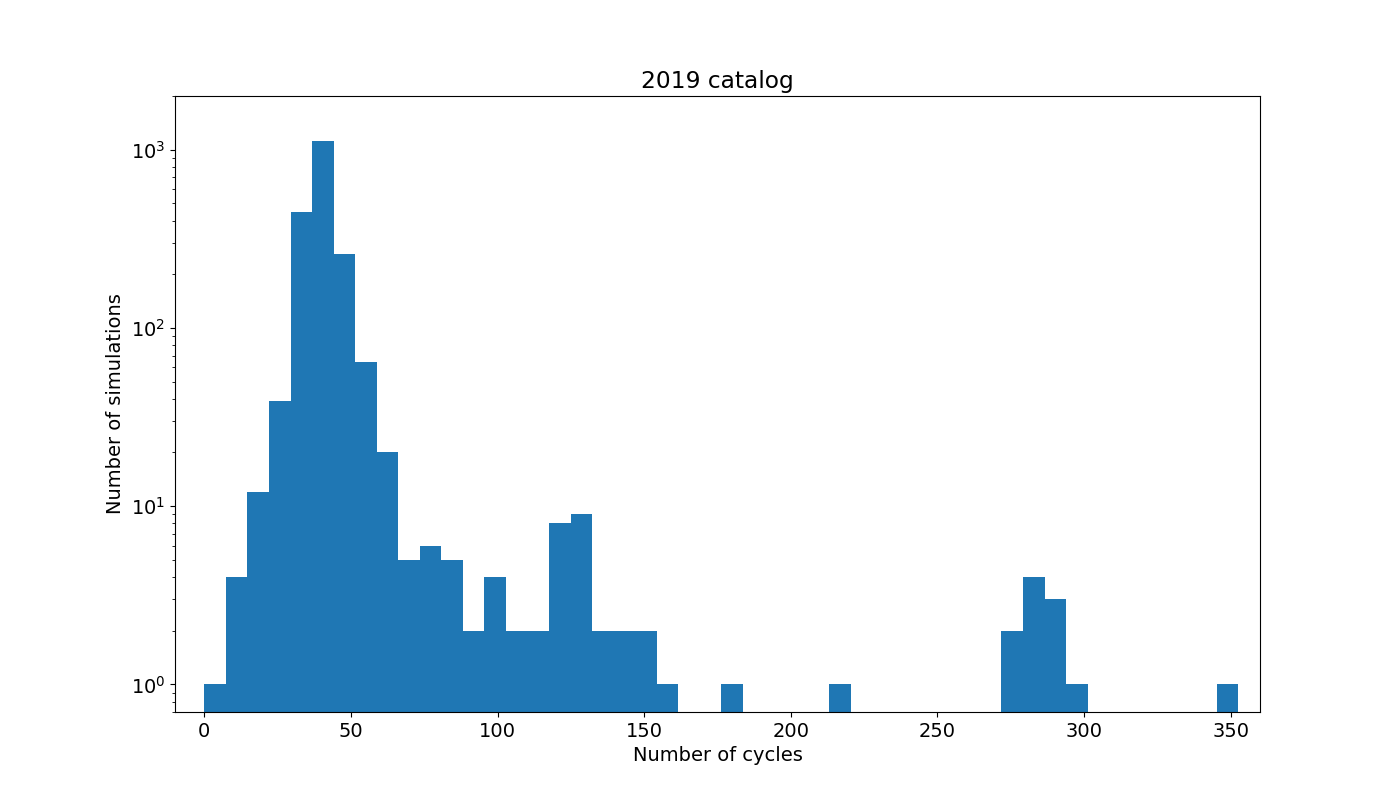

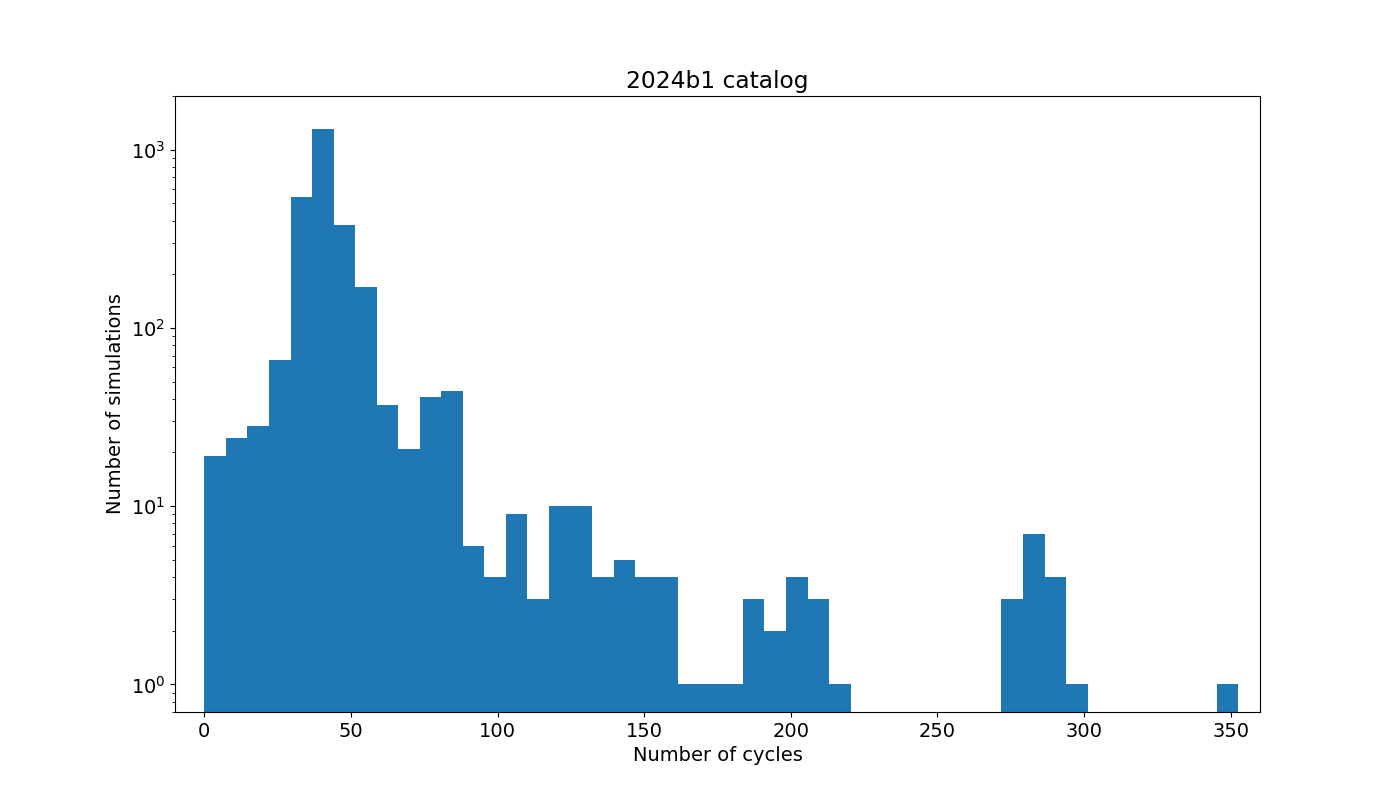

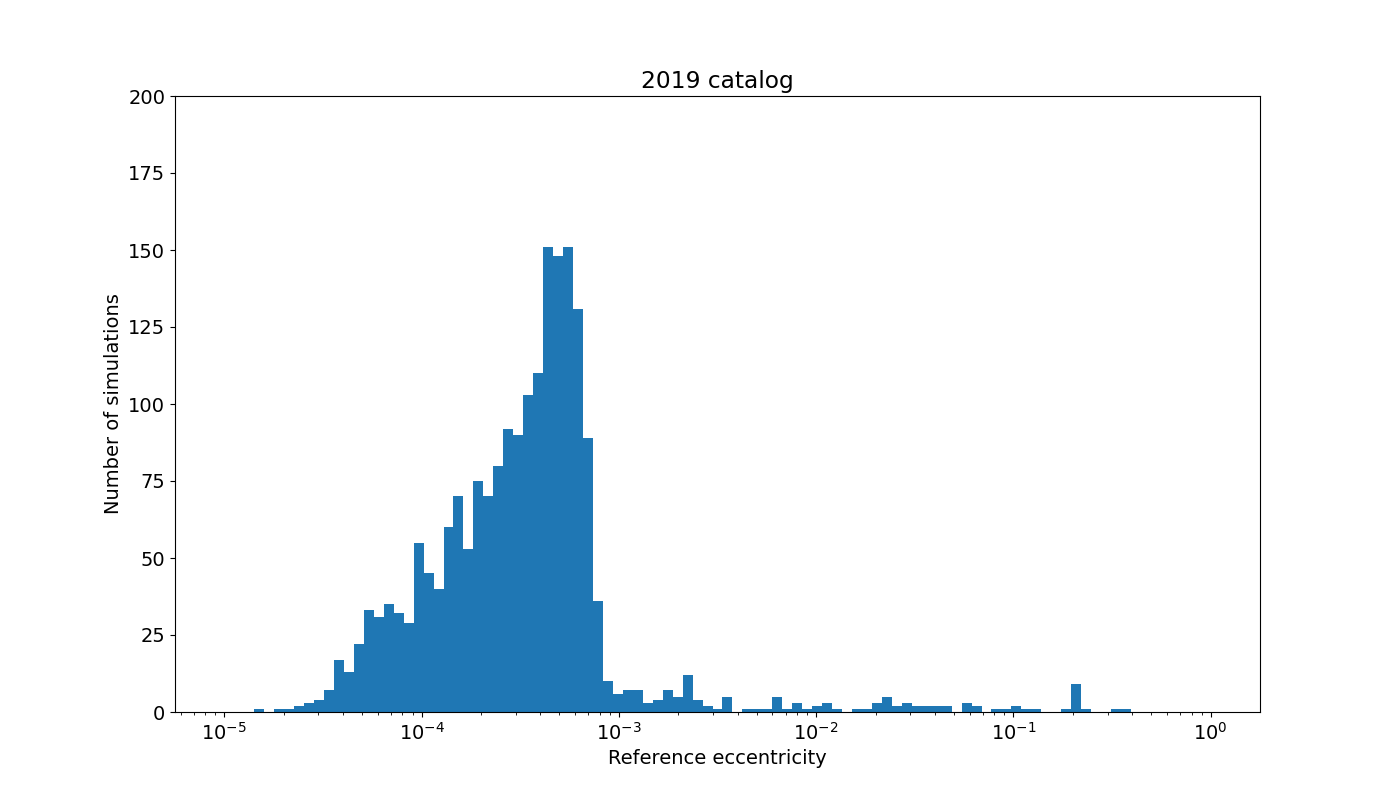

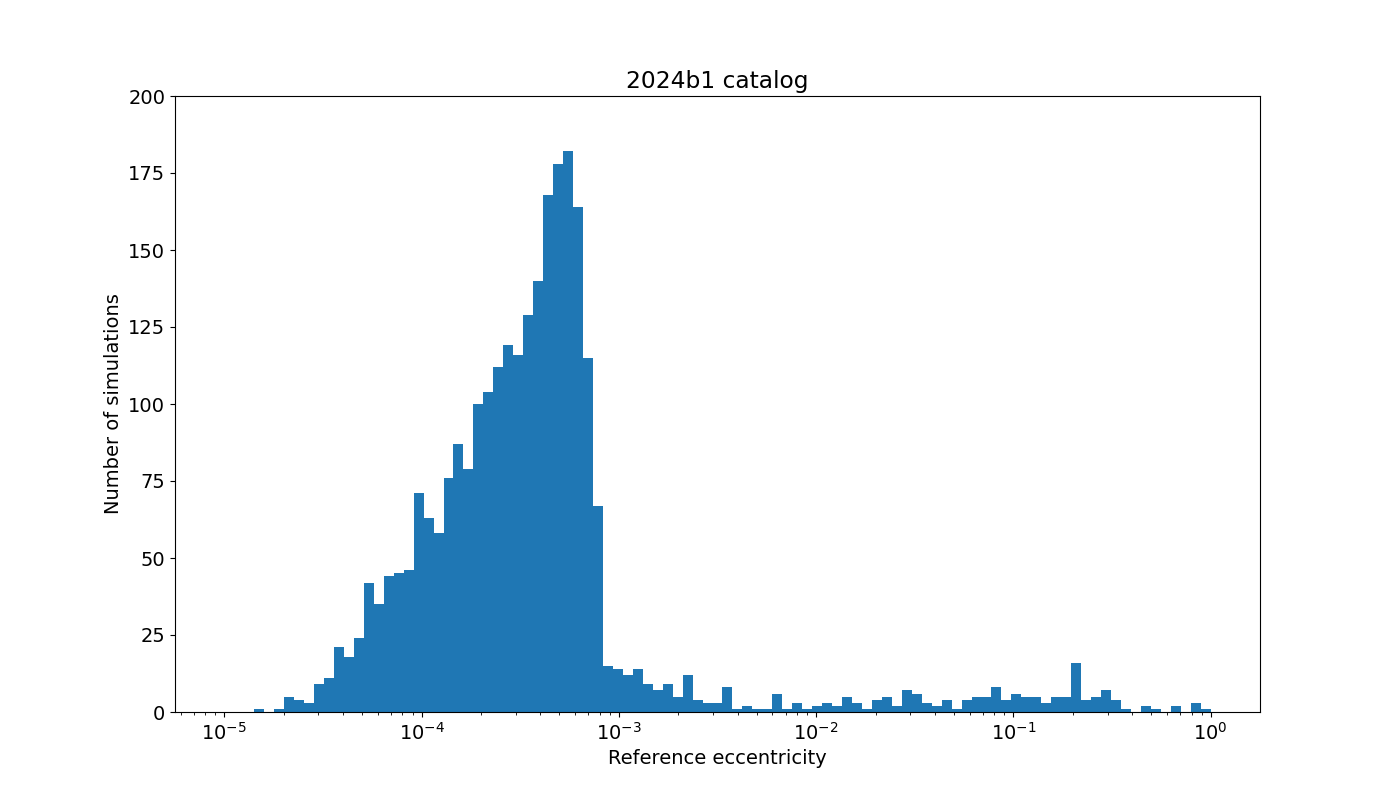

# Versions and DOIs

# Versions

Each simulation has lots of versions
  - Different post-processing
  - Different files and formats
  - Different quantities

Each time a file changes, we create a new version

# Versions

Past changes have been tied to
  - Sign convention
  - Adding new data files to each simulation
    - Center-of-mass correction
    - Inclusion of memory
  - Miscellaneous metadata changes

# History

* Previous versions have been v1.x

* New breaking version of data is v2.0
  - Totally new set of files
  - Totally new format

* Another breaking version v3.0 for CCE
  - New new files
  - Same format
  - Different data

# SXS IDs
  - SXS:BBH:0001
  - SXS:BHNS:0001
  - SXS:NSNS:0001

# Versioned SXS IDs
  - SXS:BBH:0001v1.4
  - SXS:BHNS:0001v1.6
  - SXS:NSNS:0001v2.0

# DOIs
  - We mint a DOI for each version of each simulation
  - We have our own DOI prefix: 10.26138


DOIs look like

        prefix / SXS ID [version]


  - 10.26138/SXS:BBH:0001
  - 10.26138/SXS:BBH:0001v2.0

* Use unversioned ID/DOI when just exploring
* Use versioned DOI for reproducibility and citing

# Metadata

Lots of useful information:
  - object types
  - masses
  - spins
  - number of orbits
  - dates

Two important groups of metadata:
  - `initial_`
  - `reference_`
  
`sxs` adds in some fields, adds tab completion

# Problems with metadata

- Not all fields are present for all simulations
  - `merger_time`?
  - `common_horizon_time`?
- Some fields change names randomly
  - `EOS` or `eos`?
- Some fields change data type randomly
  - float or string?

# Dataframe

* `pandas.DataFrame` for heterogeneous tabular data
* best-effort consistent data types
* missing values: NaN
* a few ignored fields
* new fields
  - every vector gets a `_mag` field
  - `reference_eccentricity_bound`

# Simulations

    simulations = sxs.load("simulations")

Maps SXS IDs to metadata

# Horizons

```python
sxs.load("SXS:BBH:1234").horizons
```

* Apparent horizons
* A, B, and C

# Stored for each horizon

- `time` (different for A,B and C)
- `areal_mass` (Area/16π)
- `christodoulou_mass`
- `dimensionful_inertial_spin`
- `chi_inertial` (dimensionful_inertial_spin / christodoulou_mass^2)
- magnitudes of spins
- `coord_center_inertial`

# Computed from data

  - `separation`
  - `newtonian_com`
  - `n̂`, `nhat`
  - `λ̂`, `lambdahat`
  - `ℓ̂`, `ellhat`

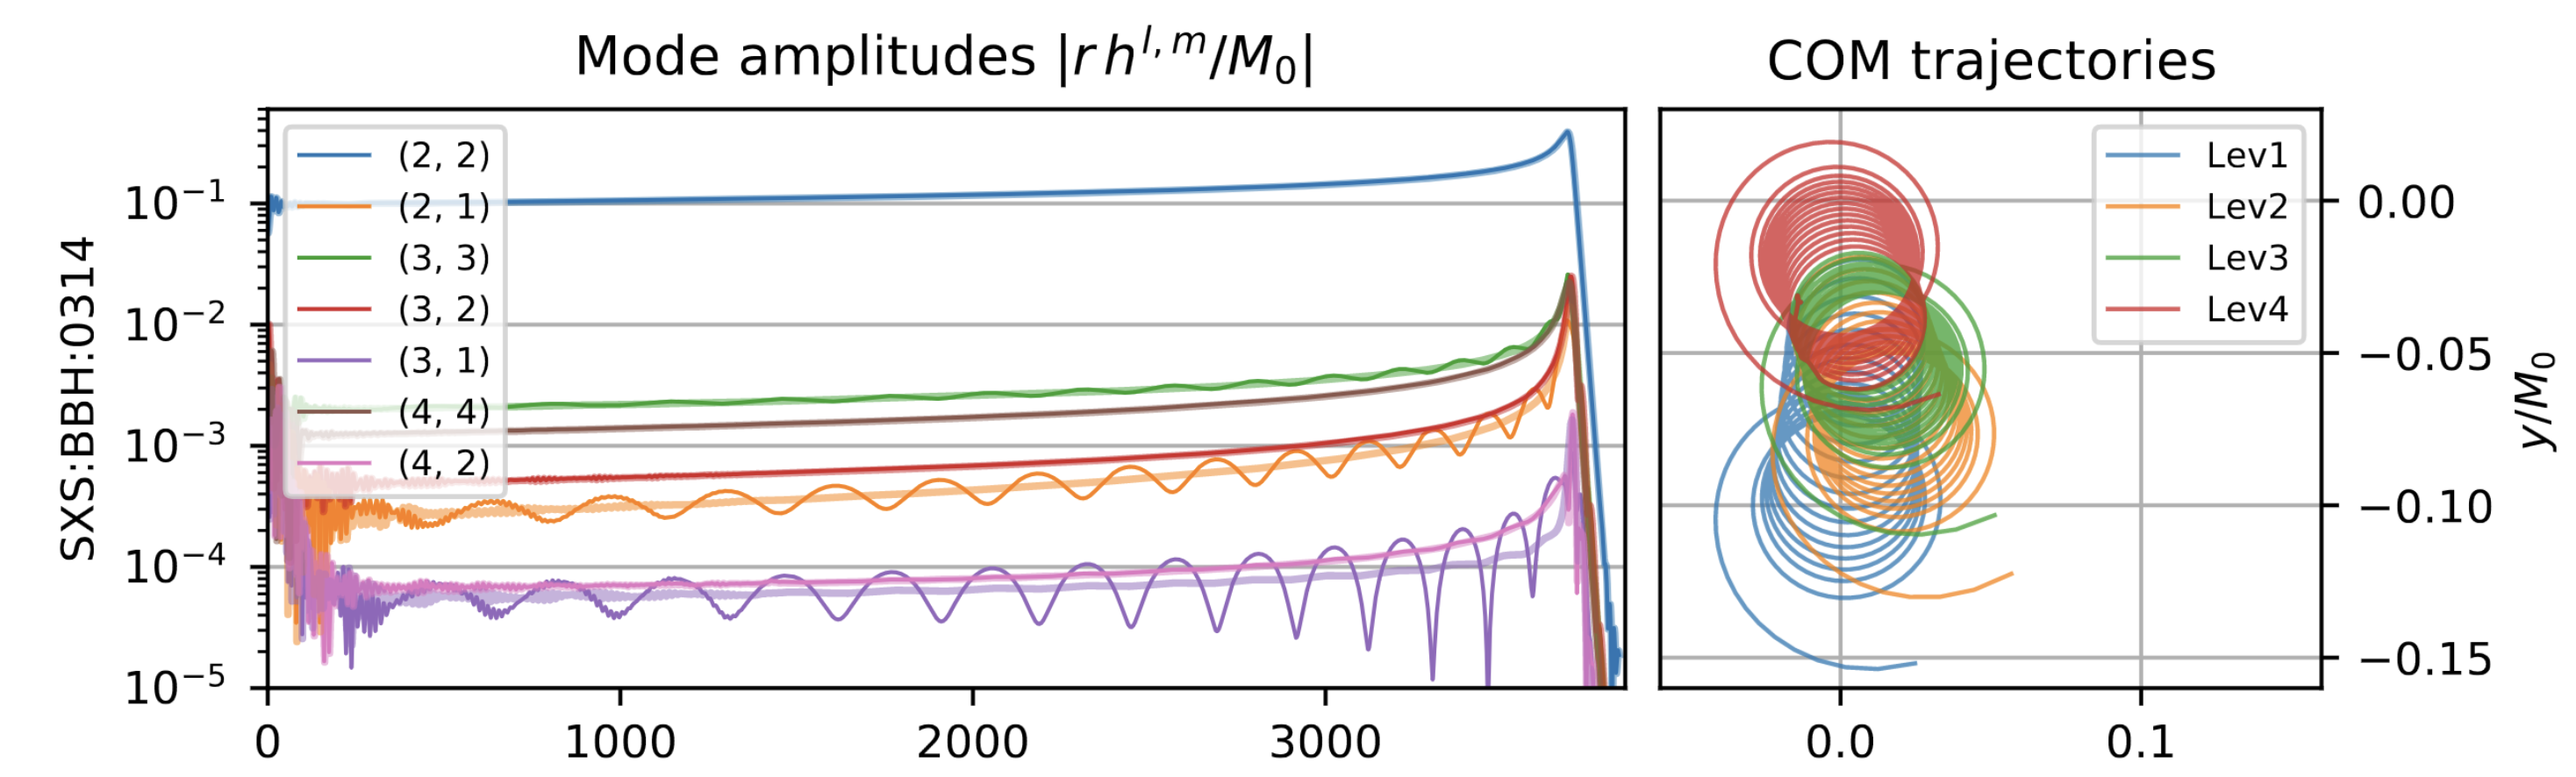

arxiv:1904.04831

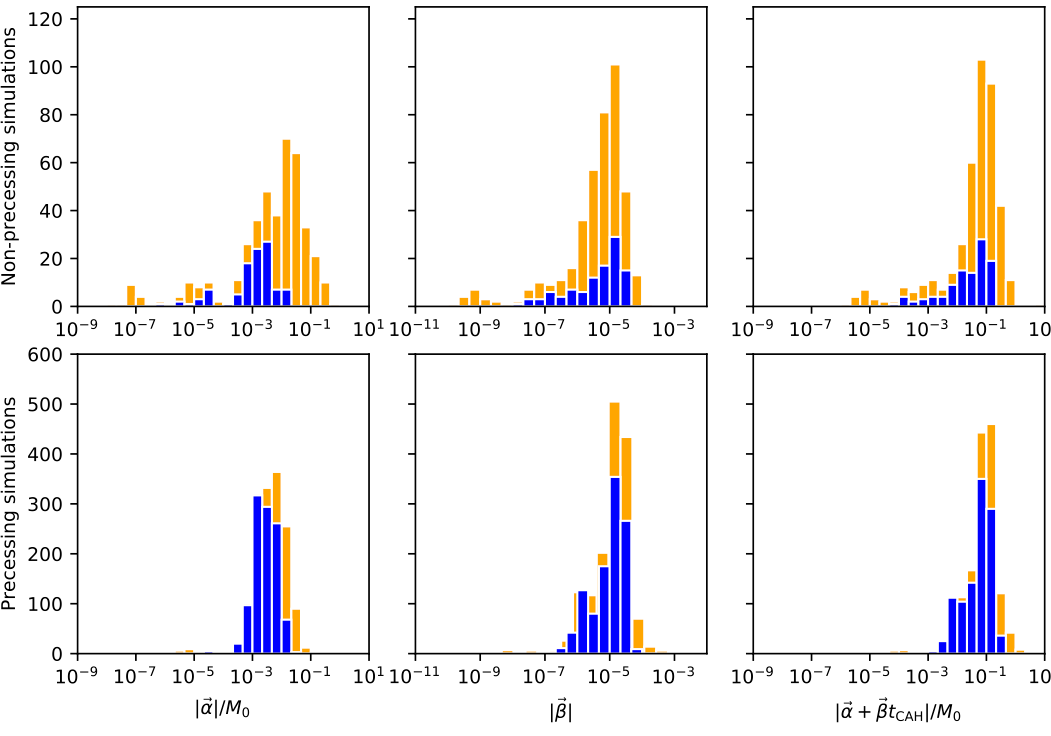

arxiv:1904.04831

# Waveforms

# No such thing as an invariant waveform
  - Despite claims (even by our own group members)
  - Even at linear order
  - Newman-Penrose/Weyl "scalars" are not scalars
  - Regge-Wheeler-Zerilli "invariants" does not refer to waveforms

# CoM correction

<nop/> <div style="width: 800px;">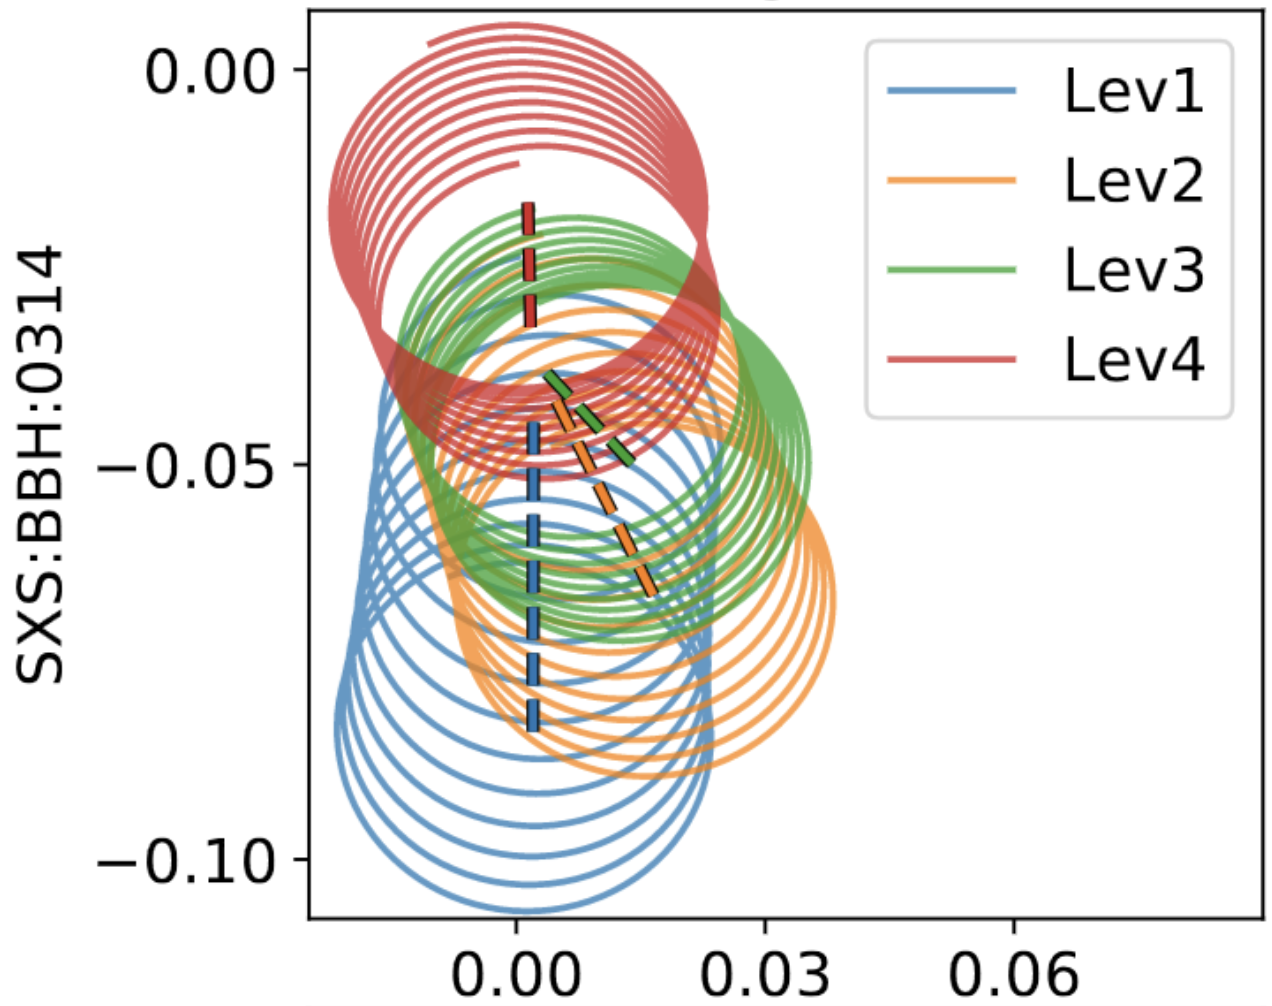</div>
arxiv:1904.04842

# Extrapolation

* Define corrected retarded time on each sphere
\begin{equation*}
    u_{i,j} = \int_{0}^{T_{i}} \sqrt{ \frac{-1/g_{j}^{TT}(T)} {1 - 2 M_{\mathrm{ADM}} / R_{j}(T)} } dT - R_{j}(T_{i}) - 2 M_{\mathrm{ADM}} \ln \left[ \frac{R_{j}(T_{i})}{2 M_{\mathrm{ADM}}} - 1 \right],
\end{equation*}

* Fit the waveforms with a simple
\begin{equation*}
  f(u, r) \approx \sum_{j=0}^N \frac{f_{(j)}(u)} {r^j}
\end{equation*}
* Extrapolated waveform is $f_{(0)}(u)$

# Modes


\begin{equation*}
  f(u, \theta, \phi) = \sum_{\ell,m} {}_{-2}Y_{\ell,m}(\theta, \phi)\, f_{\ell,m}(u)
\end{equation*}

We keep up to $\ell=8$

# The problem

* Total catalog is ~16 TB
* Extrapolated waveform files currently average 95 MB each
* Users who want one waveform from each simulation need ~200 GB
* This is accelerating

# Solution: new data format
  - 5-20x compression (on average 7x)
  - Typical user needs ~8.5 GB
  - Scary!

In [ ]:
# Compute the total size of downloading Strain_N2 for the highest Lev of each simulation

import sxs
from tqdm import tqdm

simulations = sxs.load("simulations")

total_size = 0
for sxs_id in tqdm(simulations):
    try:
        sim = sxs.load(sxs_id, ignore_deprecation=True)
        total_size += sim.files[f"{sim.lev}:Strain_N2.h5"]["size"]
    except KeyboardInterrupt:
        break
    except Exception as e:
        print(f"Failed with {sxs_id}: {e}")

print(f"{total_size:_} B")
print(f"{total_size/1024**3:_} GiB")

# Some scary stuff about the new format 👻

* Named RPDMB for "Rotating Paired Differenced Multishuffled Bzipped"
* Uses a (co-)rotating frame
* Stores modes as conjugate pairs
* Truncates bits to $10^{-10}$ precision
* Adds zero!
* Applies incremental bitwise differencing
* Multi-shuffles the bits of the floating-point numbers
* Bzips each mode independently
* Stored as an opaque series of bytes

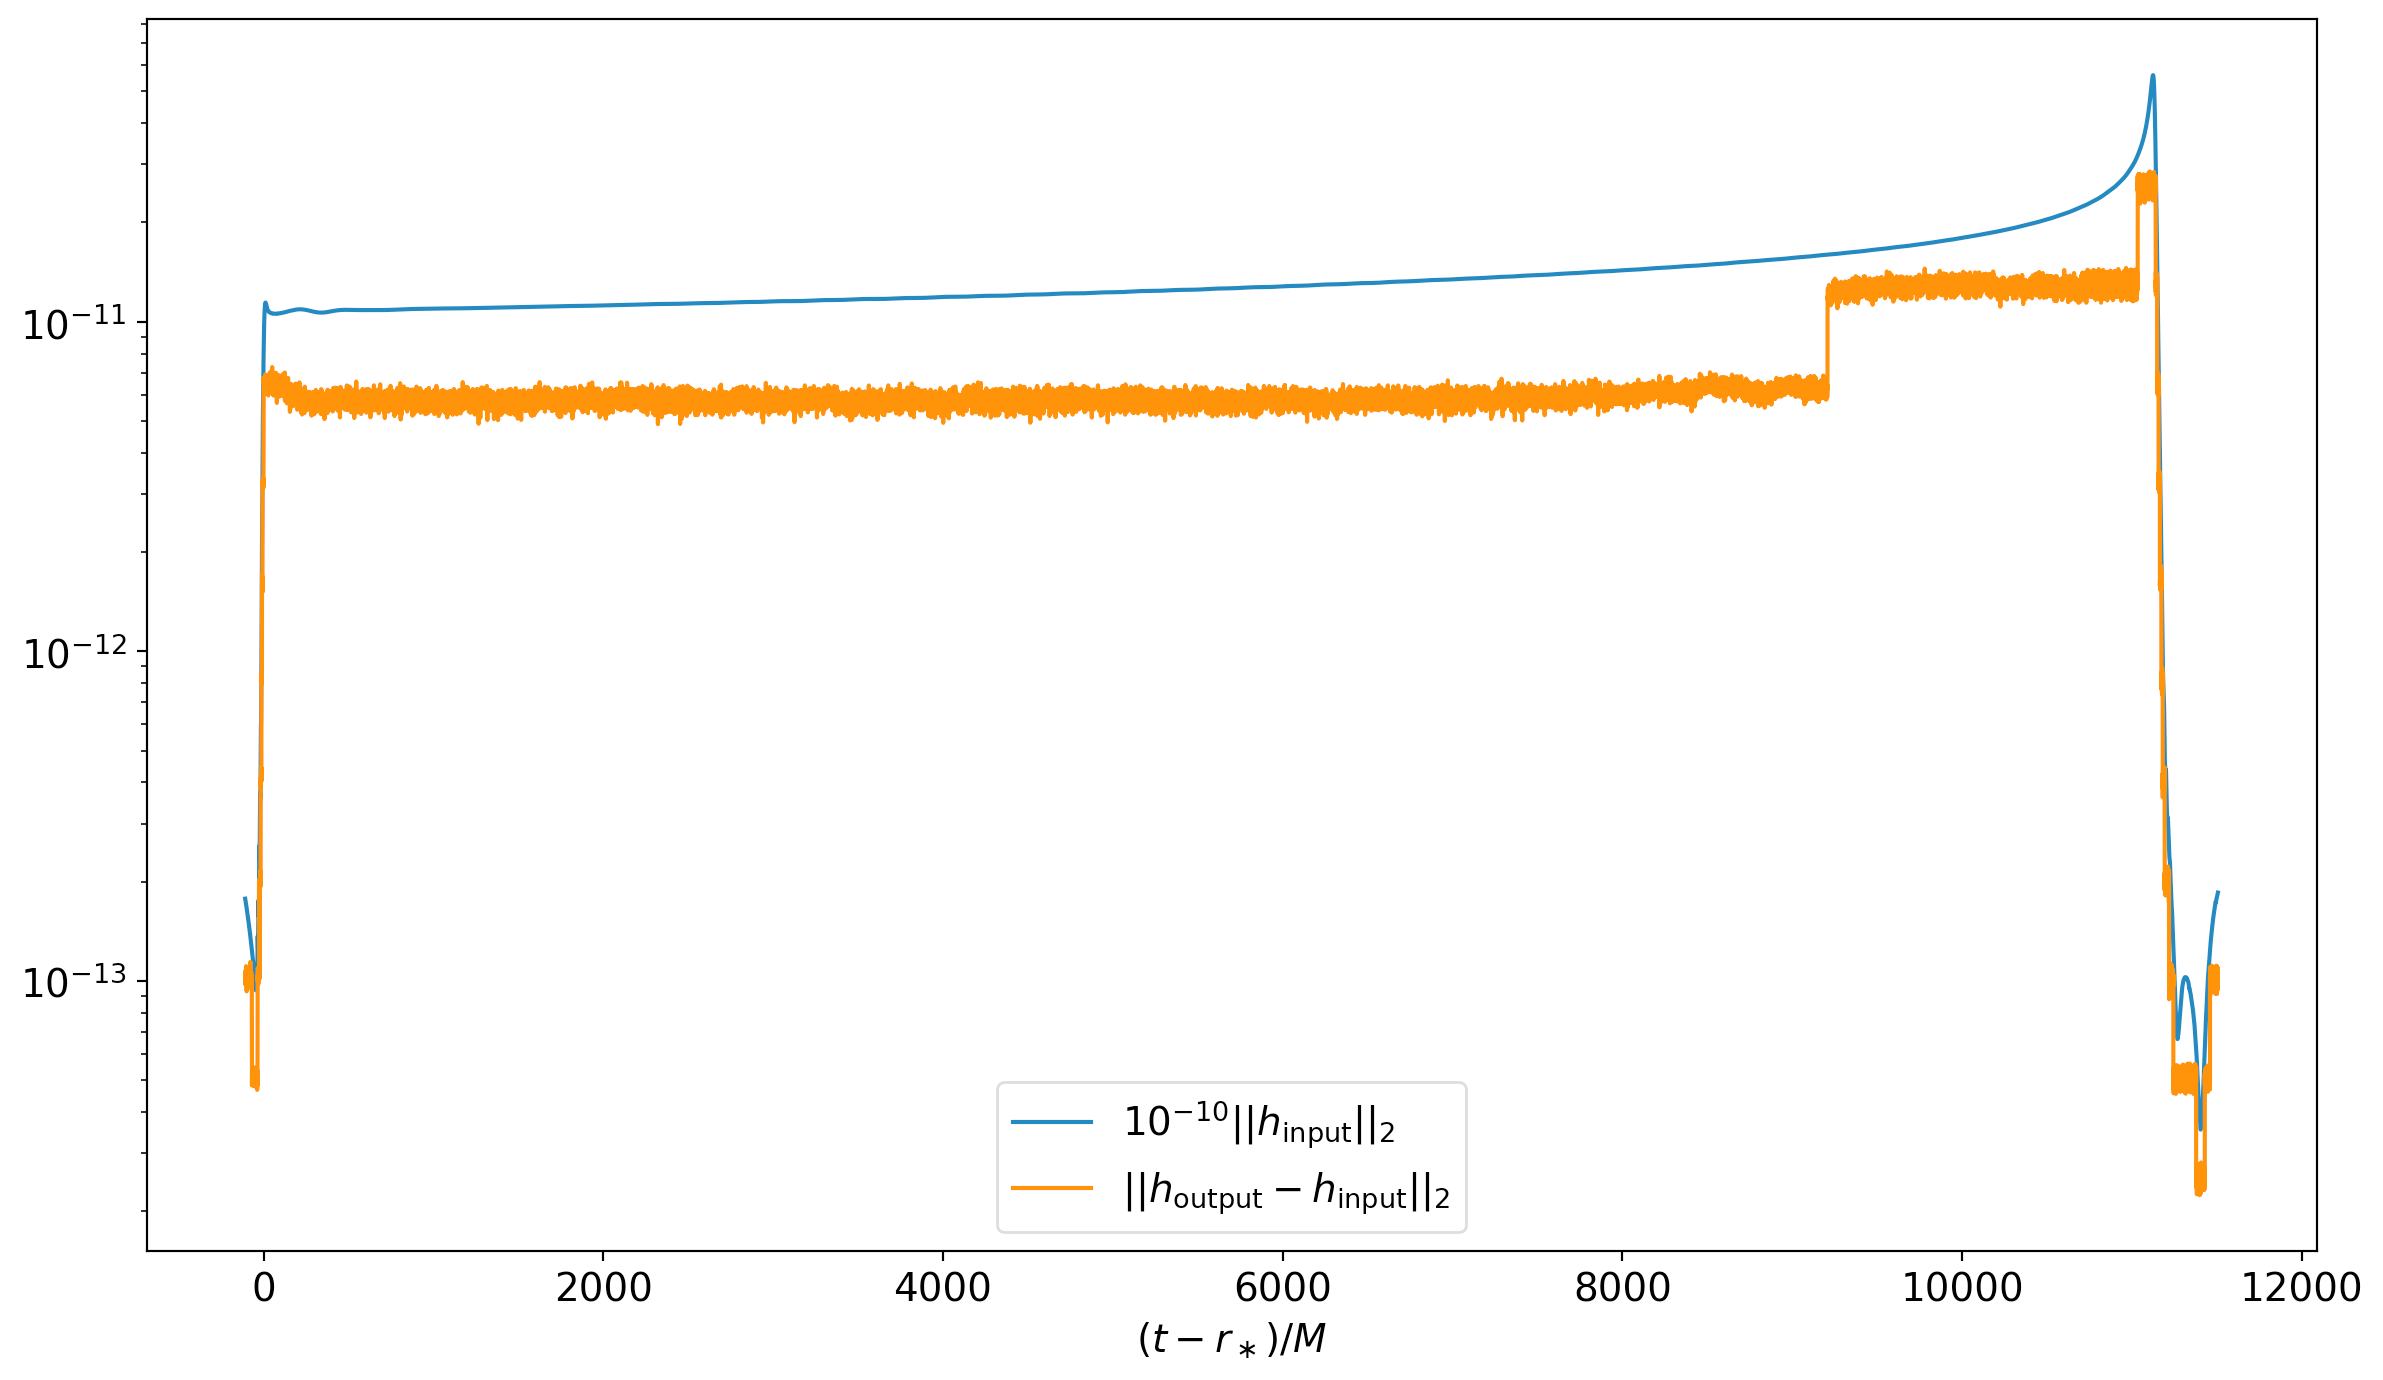

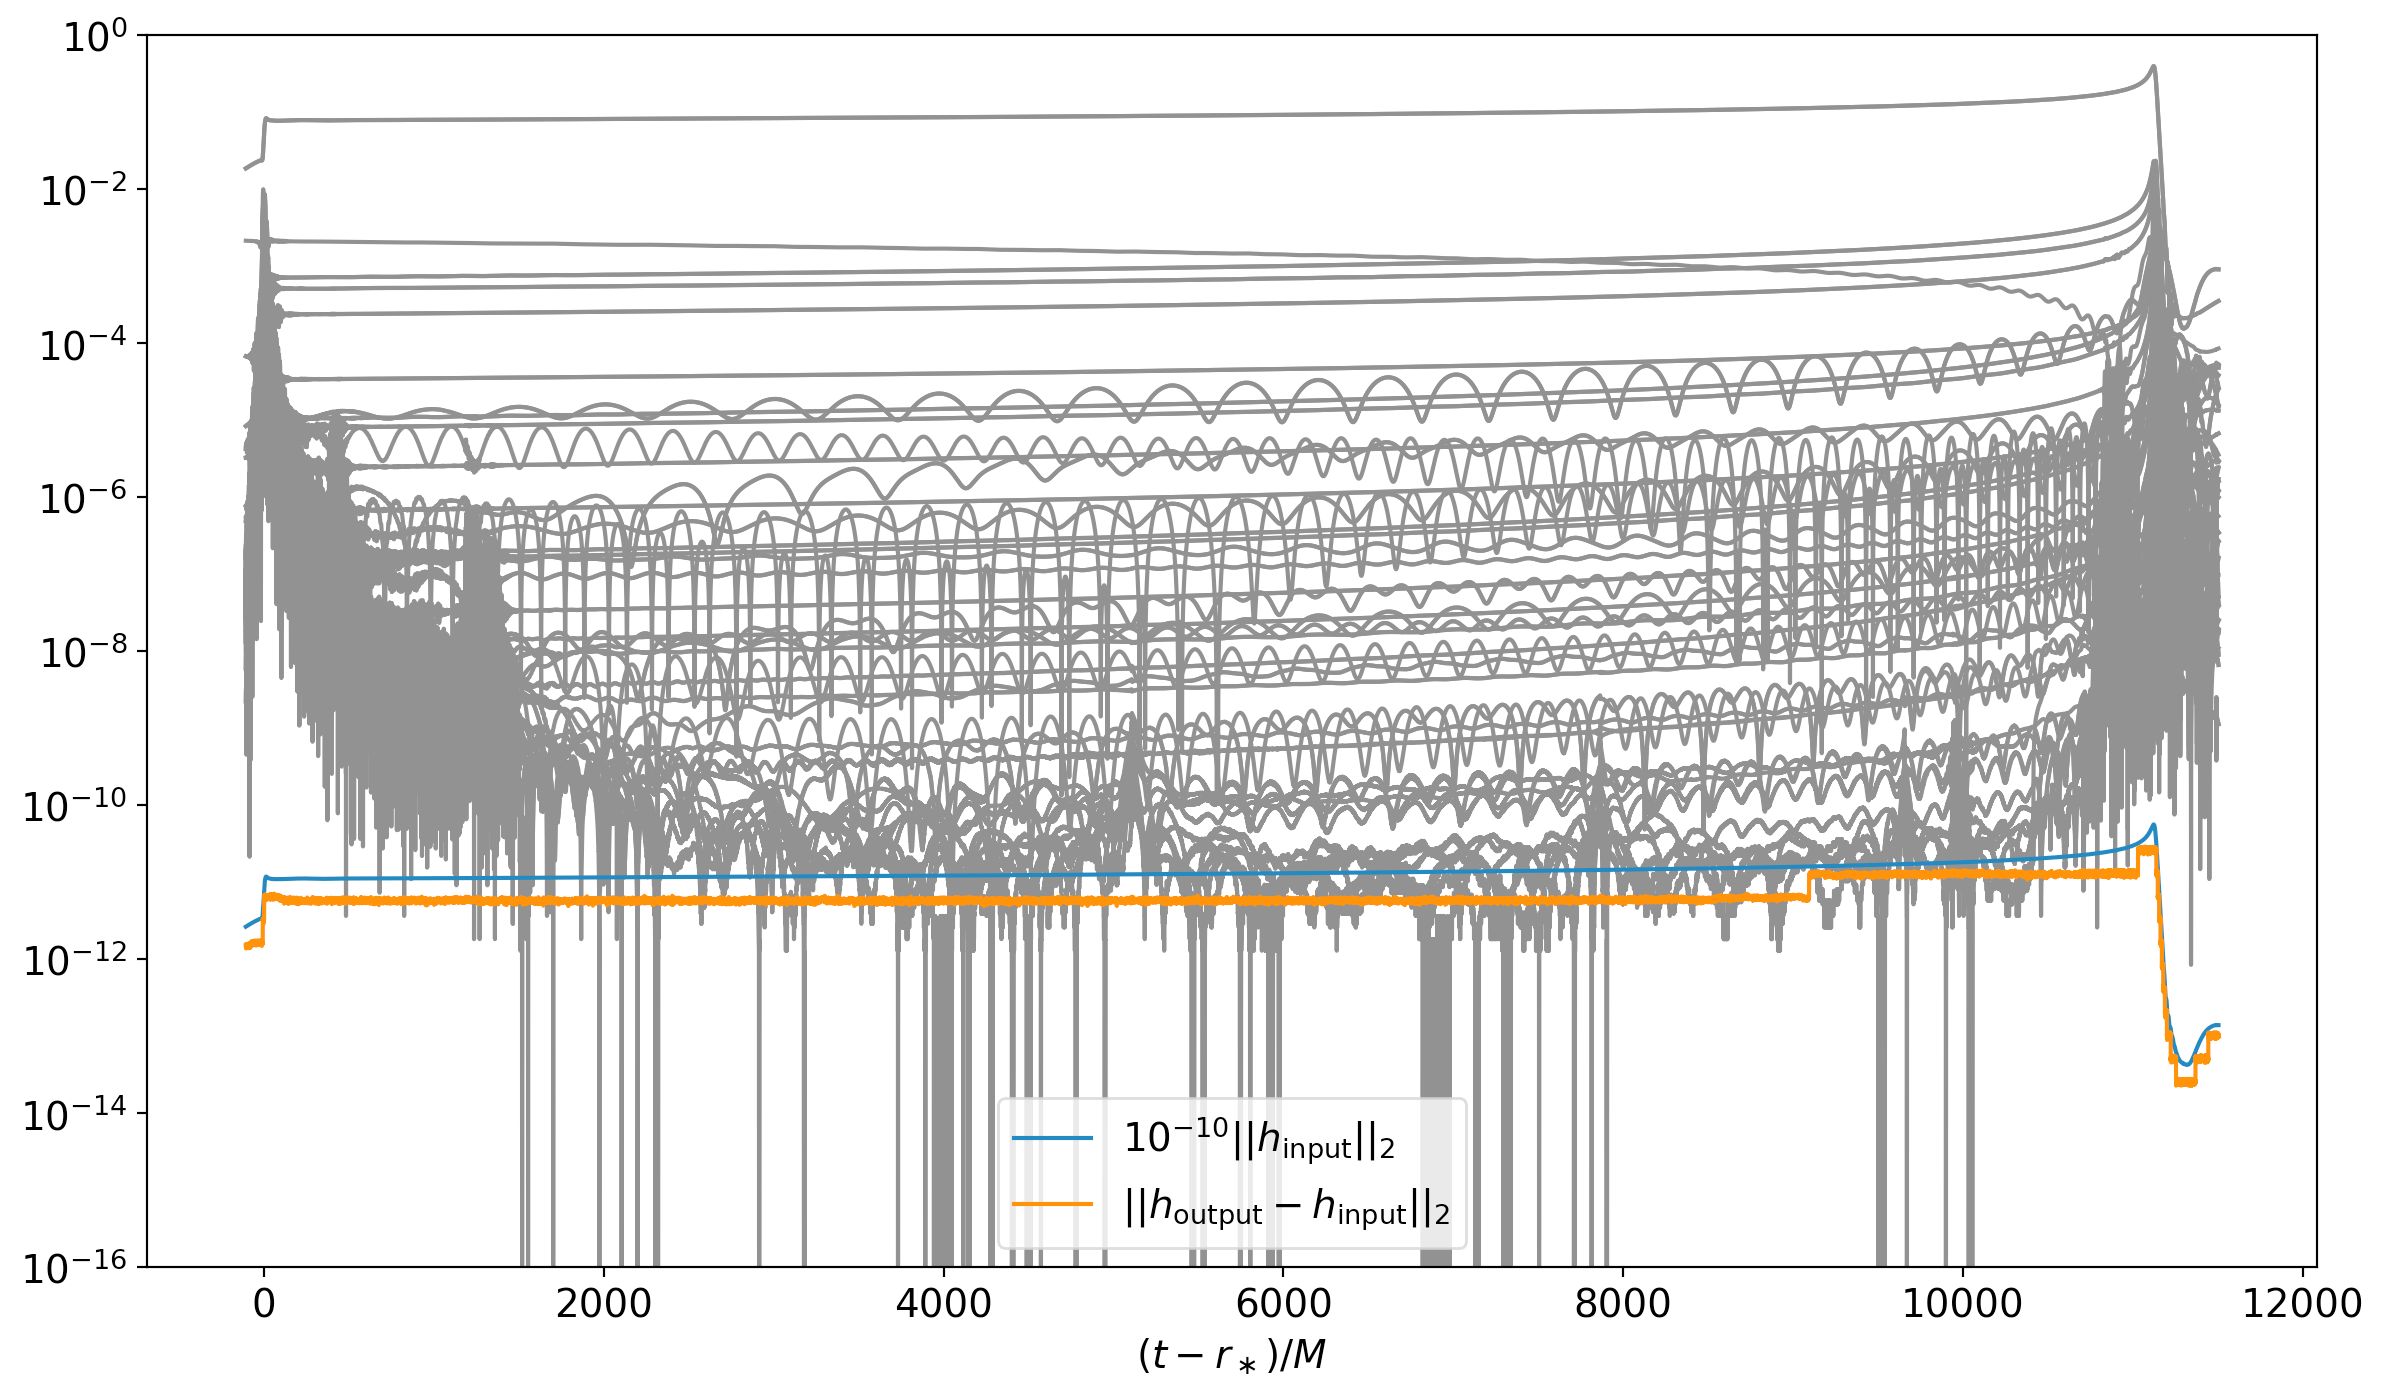

```python
sxs.load("SXS:BBH:1234").h
sxs.load("SXS:BBH:1234").psi4
```

# WaveformModes

Collects
  - `data` (n_times, n_modes)
  - `time` (n_times)
  - `ell_min`
  - `ell_max`
  - lots of other pieces

# WaveformModes

Computes
- `index(ell, m)`
- `max_norm_time`, `max_norm_time`
- `evaluate(θ, ϕ)`
- `angular_velocity`
- `to_corotating_frame`
- `to_coprecessing_frame`
- ...